# Parte IV: K-Means y varios modelos de aprendizaje supervisado aplicados al conjunto de datos que contiene características socioeconómicas y físicas

Al conjunto de datos del dengue (conformado por población, pobreza, agua potable y promedio_habsxviv) se le agregaron los datos meteorológicos del promedio anual de precipitación, temperatura máxima y temperatura mínima del año 2010. Se prueba si los grupos que proporciona el algoritmo K-Means están mejor distribuidos con estas nuevas características. Asimismo, se comprueba si las predicciones de los algoritmos de aprendizaje supervisado son mejores que las que obtuvimos cuando no teníamos la información climatológica. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df1=pd.read_csv('datos/dengue1.csv')

In [4]:
df1.head()

,Municipio,Poblacion,Pobreza,AguaPotable,Casos,casosxmilhabs,promedio_habsxviv,Categoria
0,ACATIC,21206,10.42,79.73,0,0.000000,4.017323,0
1,ACATLÁN DE JUÁREZ,23241,2.18,97.68,5,0.215137,4.023378,1
2,AHUALULCO DE MERCADO,21714,3.78,98.27,0,0.000000,3.824176,0
3,AMACUECA,5545,5.50,98.55,1,0.180343,3.885025,1
4,AMATITÁN,14648,3.23,95.39,0,0.000000,4.210496,0


In [5]:
df2=pd.read_excel('datos/DatosMeteorologicosJalisco2010.xlsx')

In [6]:
df2.head()

,Municipio,PRCP,TMAX,TMIN,num_estacion,num_datos2010,end_year,datospropios,criterio_relleno
0,ACATIC,2.28,25.6,6.4,96,365,2010,no,1.0
1,ACATLÁN DE JUÁREZ,2.68,30.7,10.9,1,365,2010,si,NaN
2,AHUALULCO DE MERCADO,2.86,29.5,11.0,179,365,2010,si,NaN
3,AMACUECA,2.30,30.0,12.0,16,365,2010,no,1.0
4,AMATITÁN,2.57,34.5,16.3,126,320,2010,si,NaN


In [7]:
df2.drop(['Municipio','num_estacion','num_datos2010','end_year','datospropios','criterio_relleno'],axis=1, inplace=True)

In [8]:
df2

,PRCP,TMAX,TMIN
0,2.28,25.6,6.4
1,2.68,30.7,10.9
2,2.86,29.5,11.0
3,2.30,30.0,12.0
4,2.57,34.5,16.3
...,...,...,...
120,3.26,29.0,13.6
121,2.68,33.3,12.0
122,2.28,25.6,6.4
123,3.26,29.0,13.6


In [9]:
df = pd.concat([df1, df2], axis=1, sort=False)

In [10]:
df

,Municipio,Poblacion,Pobreza,AguaPotable,Casos,casosxmilhabs,promedio_habsxviv,Categoria,PRCP,TMAX,TMIN
0,ACATIC,21206,10.42,79.73,0,0.000000,4.017323,0,2.28,25.6,6.4
1,ACATLÁN DE JUÁREZ,23241,2.18,97.68,5,0.215137,4.023378,1,2.68,30.7,10.9
2,AHUALULCO DE MERCADO,21714,3.78,98.27,0,0.000000,3.824176,0,2.86,29.5,11.0
3,AMACUECA,5545,5.50,98.55,1,0.180343,3.885025,1,2.30,30.0,12.0
4,AMATITÁN,14648,3.23,95.39,0,0.000000,4.210496,0,2.57,34.5,16.3
...,...,...,...,...,...,...,...,...,...,...,...
120,ZAPOTILTIC,29192,3.87,98.71,7,0.239792,3.857105,1,3.26,29.0,13.6
121,ZAPOTITLÁN DE VADILLO,6685,20.00,98.10,2,0.299177,4.000000,1,2.68,33.3,12.0
122,ZAPOTLÁN DEL REY,17585,7.87,98.03,0,0.000000,4.026273,0,2.28,25.6,6.4
123,ZAPOTLÁN EL GRANDE,100534,1.45,98.75,6,0.059681,3.925136,0,3.26,29.0,13.6


In [11]:
caracteristicas=['Pobreza','AguaPotable','promedio_habsxviv','PRCP','TMAX','TMIN']

In [12]:
X = df[caracteristicas]
X

,Pobreza,AguaPotable,promedio_habsxviv,PRCP,TMAX,TMIN
0,10.42,79.73,4.017323,2.28,25.6,6.4
1,2.18,97.68,4.023378,2.68,30.7,10.9
2,3.78,98.27,3.824176,2.86,29.5,11.0
3,5.50,98.55,3.885025,2.30,30.0,12.0
4,3.23,95.39,4.210496,2.57,34.5,16.3
...,...,...,...,...,...,...
120,3.87,98.71,3.857105,3.26,29.0,13.6
121,20.00,98.10,4.000000,2.68,33.3,12.0
122,7.87,98.03,4.026273,2.28,25.6,6.4
123,1.45,98.75,3.925136,3.26,29.0,13.6


In [13]:
y=df.Categoria

## K-Means

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

### Método del codo

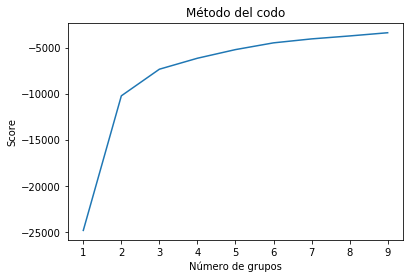

In [15]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de grupos')
plt.ylabel('Score')
plt.title('Método del codo')
plt.show()

### Método de la silueta

In [16]:
from sklearn.metrics import silhouette_score

For n_clusters = 2 The average silhouette_score is : 0.6695888161101704
For n_clusters = 3 The average silhouette_score is : 0.36229158365734815
For n_clusters = 4 The average silhouette_score is : 0.35648921107725434
For n_clusters = 5 The average silhouette_score is : 0.35083276543105607
For n_clusters = 6 The average silhouette_score is : 0.2997508076236406


Text(0, 0.5, 'Media de los coeficientes de silueta')

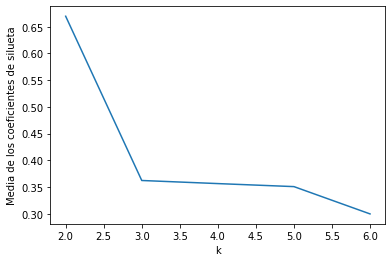

In [17]:
range_n_clusters = [2, 3, 4, 5, 6]
SILH_AVG=[]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    SILH_AVG.append(silhouette_avg)
plt.plot(range_n_clusters, SILH_AVG)
plt.xlabel('k')
plt.ylabel('Media de los coeficientes de silueta')

Tomamos 2 como el número de clusters óptimo.

#### Ejecutamos K-Means.

Especificamos el número de clusters y ajustamos el modelo a los datos de entrenamiento:

In [18]:
kmeans=KMeans(n_clusters=2).fit(X)

Predecimos el cluster más cercano a cada punto de X

In [19]:
labels = kmeans.predict(X)

Obtenemos las coordenadas de los centros de los clusters

In [20]:
#Veamos cuántos puntos contiene cada grupo 
copy=pd.DataFrame()
copy['Municipio']=df['Municipio'].values
copy['Categoria']=df['Categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['Grupo']=[0, 1]
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,Grupo,cantidad
0,0,112
1,1,13


In [21]:
from sklearn.model_selection import train_test_split # Dividir los datos en un conjunto de entrenamiento y un conjunto de validación
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.10, random_state=1)

In [22]:
from sklearn.preprocessing import StandardScaler # Normalizar los datos
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [23]:
precision = [] #en esta lista se guardará la precisión de cada modelo

## Aprendizaje Supervisado
### 1. Regresión Logística

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
classifier = LogisticRegression(random_state = 0) #definir el modelo
classifier.fit(X_train, y_train) # ajustar el modelo

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
y_pred = classifier.predict(X_test) # predecir los valores

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
from sklearn.metrics import plot_confusion_matrix

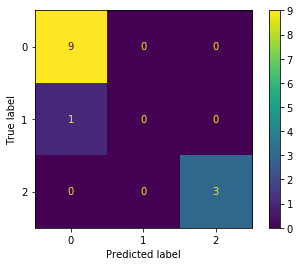

In [29]:
plot_confusion_matrix(classifier,X_test,y_test)
plt.show()

In [30]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[9, 0, 0],
       [1, 0, 0],
       [0, 0, 3]], dtype=int64)

In [31]:
true_pred=cm[0,0]+cm[1,1]+cm[2,2]
total_pred=y_test.size
accuracy=true_pred/total_pred
precision.append(accuracy)
precision

[0.9230769230769231]

### 2. K-NEAREST NEIGHBORS

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
y_pred = classifier.predict(X_test)

In [35]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[9, 0, 0],
       [1, 0, 0],
       [1, 0, 2]], dtype=int64)

In [36]:
true_pred=cm[0,0]+cm[1,1]+cm[2,2]
total_pred=y_test.size
accuracy=true_pred/total_pred
precision.append(accuracy)
precision

[0.9230769230769231, 0.8461538461538461]

### 3. SUPORT VECTOR MACHINES

In [37]:
from sklearn.svm import SVC

In [38]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [39]:
y_pred = classifier.predict(X_test)

In [40]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[9, 0, 0],
       [1, 0, 0],
       [0, 0, 3]], dtype=int64)

In [41]:
true_pred=cm[0,0]+cm[1,1]+cm[2,2]
total_pred=y_test.size
accuracy=true_pred/total_pred
precision.append(accuracy)
precision

[0.9230769230769231, 0.8461538461538461, 0.9230769230769231]

### 4. KERNEL SVM

In [42]:
from sklearn.svm import SVC

In [43]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [44]:
y_pred=classifier.predict(X_test)

In [45]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[9, 0, 0],
       [1, 0, 0],
       [1, 0, 2]], dtype=int64)

In [46]:
true_pred=cm[0,0]+cm[1,1]+cm[2,2]
total_pred=y_test.size
accuracy=true_pred/total_pred
precision.append(accuracy)
precision

[0.9230769230769231,
 0.8461538461538461,
 0.9230769230769231,
 0.8461538461538461]

### 5. Naïve Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
y_pred=classifier.predict(X_test)

In [50]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[8, 1, 0],
       [1, 0, 0],
       [1, 0, 2]], dtype=int64)

In [51]:
true_pred=cm[0,0]+cm[1,1]+cm[2,2]
total_pred=y_test.size
accuracy=true_pred/total_pred
precision.append(accuracy)
precision

[0.9230769230769231,
 0.8461538461538461,
 0.9230769230769231,
 0.8461538461538461,
 0.7692307692307693]

### 6. Decision Tree Algorithm

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [54]:
y_predict=classifier.predict(X_test)

In [55]:
cm=confusion_matrix(y_test, y_predict)
cm

array([[9, 0, 0],
       [1, 0, 0],
       [1, 0, 2]], dtype=int64)

In [56]:
true_pred=cm[0,0]+cm[1,1]+cm[2,2]
total_pred=y_test.size
accuracy=true_pred/total_pred
precision.append(accuracy)
precision

[0.9230769230769231,
 0.8461538461538461,
 0.9230769230769231,
 0.8461538461538461,
 0.7692307692307693,
 0.8461538461538461]

### 7. Random Forest Classification

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [59]:
y_predict=classifier.predict(X_test)

In [60]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[8, 1, 0],
       [1, 0, 0],
       [1, 0, 2]], dtype=int64)

In [61]:
true_pred=cm[0,0]+cm[1,1]+cm[2,2]
total_pred=y_test.size
accuracy=true_pred/total_pred
precision.append(accuracy)
precision

[0.9230769230769231,
 0.8461538461538461,
 0.9230769230769231,
 0.8461538461538461,
 0.7692307692307693,
 0.8461538461538461,
 0.7692307692307693]

#### Tabla de precisión de los algoritmo de clasificación

In [62]:
algoritmos=['logistic reg','kNN','SVM', 'Kernel SVM','Naive bayes', 'Decision Tree', 'Random Forest']
algoritmos=np.array(algoritmos).reshape(7,1)
precision=np.array(precision).reshape(7,1)

In [64]:
tabla2=pd.DataFrame({'Algoritmo': algoritmos[:, 0], 'Precisión': precision[:, 0]})
tabla2

,Algoritmo,Precisión
0,logistic reg,0.923077
1,kNN,0.846154
2,SVM,0.923077
3,Kernel SVM,0.846154
4,Naive bayes,0.769231
5,Decision Tree,0.846154
6,Random Forest,0.769231


## Discusión de resultados
Respecto al algoritmos K-Means, no encontramos ninguna mejora, pues sigue sin encontrar un patrón en el nivel de casos de dengue. 

Comparando la `tabla1` con la `tabla2`, de la PARTEII, observamos que todos los algoritmos tuvieron un porcentaje de precisión más alto que con el conjunto de datos de características socioeconómicas. 

Lo siguiente sería buscar la información de más estados de la república o de otras partes del mundo que cuentan con las características que utilizamos en este estudio, pues recordemos que tenemos un problema con el desbalance de nuestros datos. 